In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

### Знание 5
 t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу  

​
 
​
  $$\bar{x}\pm 1,96*\frac{sd_{x}}{\sqrt{n}} $$


 

Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида: $$\bar{X}=89,9$$ 

$$sd=11,3$$ 

$$n=20 $$

Для этого определите, в каком диапазоне находится 95% наблюдений у соответствующего t-распределения (df = n - 1) и используйте это значение вместо коэффициента 1.96. 

Для этого воспользуемся таблицей критических значений для t-распределения для нахождения нужного t-значения. В этой таблице нас интересует столбец, где A=0.95 (область под кривой). На пересечении этого столбца и строки с нужным числом степеней свободы и находится интересующее нас значение.

In [2]:
t = 2.093
sd = 11.3
n = 20
df = n - 1
x = 89.9

print(x - t * (sd / np.sqrt(n)), x + t * (sd / np.sqrt(n)), sep='\n\n')

84.61149798709502

95.18850201290499


### Задание 6

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t-критерий, проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.


Note: Рассчитав t-значение, вы можете сравнить его с табличным, чтоб принять статистическое решение: отклонять ли нулевую гипотезу. Опять же, обратимся к таблице t-значений, как и в предыдущем задании найдем критическое значение для нашего эксперимента (на пересечении строки c нужным числом степеней свободы  и столбца, где P=0.05).  Если рассчитанное вами t-значение больше табличного: отклоняем нулевую гипотезу при p < 0.05.

Сайт, где можно рассчитывать площадь под кривой в ситуации различных распределений и с различным числом степеней свободы: тык 

$$t = {x̄ - μ \over \sqrt {s^2 \over n}}$$

$$t = \frac{\bar x1 - \bar x2}{\sqrt{\frac{sd^2_1}{n_1} + \frac{sd^2_2}{n_2}}}$$

In [3]:
x1 = 45
x2 = 34
sd1 = 9
sd2 = 10
n = 100
t = (x1 - x2) / np.sqrt((sd1 ** 2 / n) + (sd2 ** 2 / n))
t

8.176235608718828

# Мини-проект

Итак, настало время провести свой первый A/B тест.

Задание
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

In [4]:
public_key = 'https://disk.yandex.ru/d/l7RSVjrz_a3GJg'

In [5]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [6]:
courier_df = pd.read_csv(download_url)
courier_df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [7]:
courier_df['experiment_group'].value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

In [8]:
courier_df['district'].value_counts()

Purlieus    16960
Central      2396
Suburb        840
Name: district, dtype: int64

### Step 3
Сопоставьте графики распределения и  экспериментальные группы

In [9]:
control = courier_df[courier_df['experiment_group'] == 'control'].groupby('district')['delivery_time']
test = courier_df[courier_df['experiment_group'] == 'test'].groupby('district')['delivery_time']

district
Central     Axes(0.547727,0.11;0.352273x0.77)
Purlieus    Axes(0.547727,0.11;0.352273x0.77)
Suburb      Axes(0.547727,0.11;0.352273x0.77)
Name: delivery_time, dtype: object

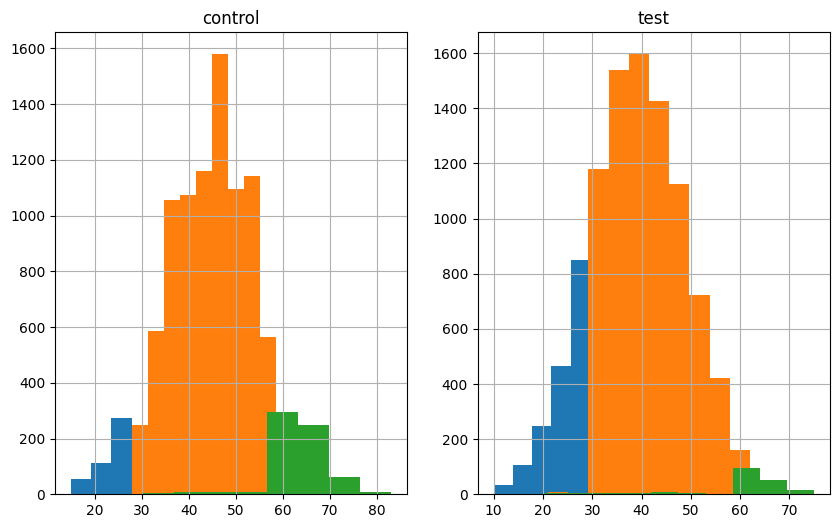

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('control')
control.hist()
plt.subplot(1, 2, 2)
plt.title('test')
test.hist()

### Step 4
Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [11]:
courier_df[courier_df['experiment_group'] == 'control'].count() - courier_df[courier_df['experiment_group'] == 'test'].count()

order_id           -12
delivery_time      -12
district           -12
experiment_group   -12
dtype: int64

### Step 5
Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

Вообще для выборок таких колоссальных размеров мы не обязаны это делать - в отсутствие слишком уж выраженной асимметрии и выбросов в данных t-тест и так работать будет нормально, но посмотреть лишний раз всё равно можно :)

Обычно нормальность тестируют с помощью теста Шапиро-Уилка (scipy.stats.shapiro()), однако на больших выборках этот тест слишком рьяно находит отклонения от нормальности! Поэтому используйте функцию scipy.stats.normaltest() - она больше адаптирована к большим выборкам:

#работает примерно так
#берём данные нужной нам группы

данные = датафрейм.query("условие_отбирающее_нужную_группу").колонка

#и кладём в функцию
scipy.stats.normaltest(данные)


Также можете сделать это через пакет pingouin - вот этой функцией. Не забудьте выбрать правильный аргумент!

pingouin.normality(data=датафрейм, dv="колонка_с_нужной_переменной", 
                   group="колонка_с_группами", method="normaltest")




In [12]:
from scipy.stats import normaltest

In [14]:
control_group_df = courier_df[courier_df['experiment_group'] == 'control']
test_group_df = courier_df[courier_df['experiment_group'] == 'test']

In [17]:
normaltest(control_group_df['delivery_time'])

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [16]:
normaltest(test_group_df['delivery_time'])

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [19]:
test_group_df['delivery_time'].std().round(2)

9.88

In [20]:
control_group_df['delivery_time'].std().round(2)

9.99

### Step 6
Вас могла смутить ненормальность распределения теста, полученная на прошлом шаге - однако если посмотреть на саму форму распределения, то оно не настолько сильно нарушает нормальность, чтобы об этом беспокоиться на таком размере выборки! Поэтому не переживаем 😎

Теперь пришло время сравнить средние в тесте и контроле. 

In [26]:
ttest_ind(test_group_df['delivery_time'], control_group_df['delivery_time'])

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

### Step 7
На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

Знак изменения необходимо учесть!

In [31]:
(test_group_df['delivery_time'].mean() / control_group_df['delivery_time'].mean() * 100 - 100).round(2)

-13.35